In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax  = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
sep_coins = cv2.imread('../../DATA/pennies.jpg')

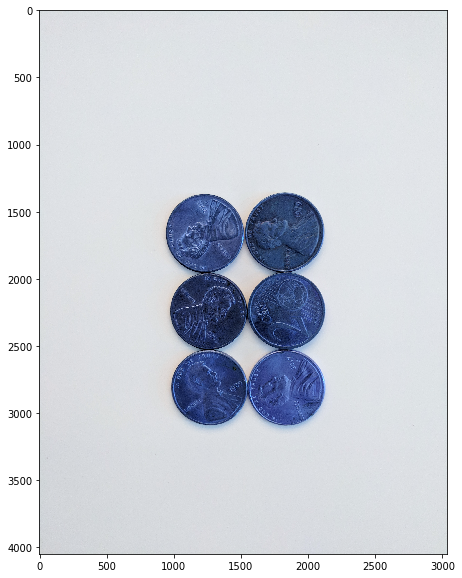

In [5]:
display(sep_coins)

In [7]:
# Median blur  - to avoid from faces inside the coin, for only concern about circles
# Grayscale
#Binary Threshold
# Find Contours

In [9]:
sep_blur = cv2.medianBlur(sep_coins,25)

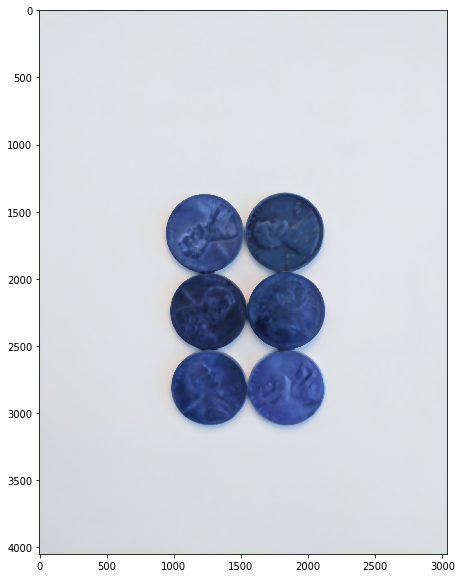

In [10]:
display(sep_blur)

In [11]:
gray_sep_coins  = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

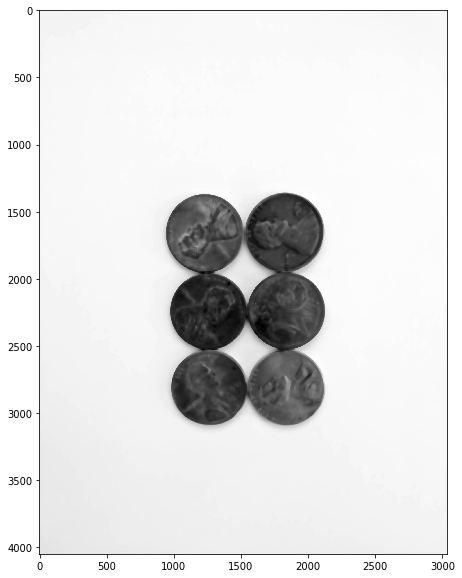

In [12]:
display(gray_sep_coins)

In [13]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

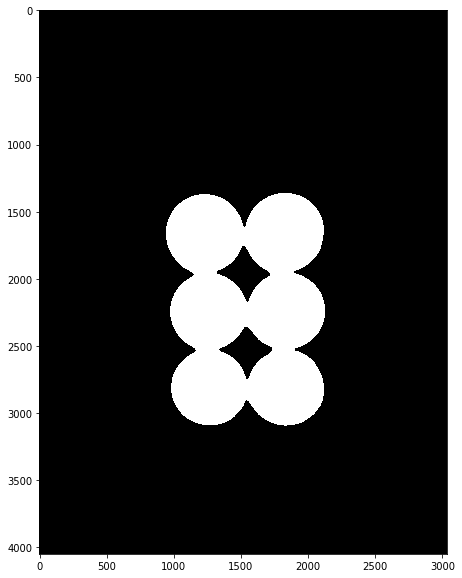

In [14]:
display(sep_thresh)

In [15]:
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
for i  in range (len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

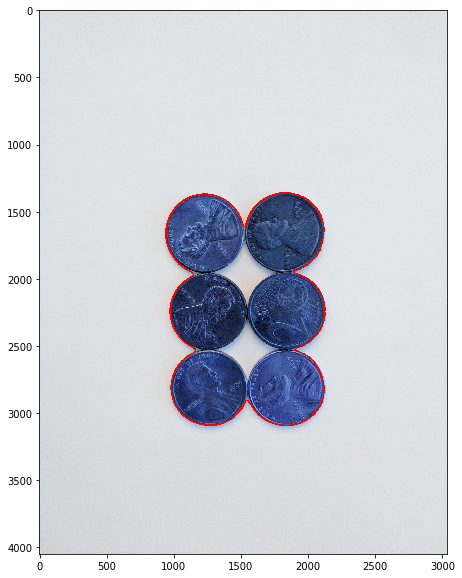

In [17]:
display(sep_coins)

In [18]:
#we can use erosion but it will couse to distorting actual width and redius of penies and distort actuall result

In [19]:
###using watershed algorithm

In [20]:
img = cv2.imread('../../DATA/pennies.jpg')

In [23]:
img = cv2.medianBlur(img,35) #here use 35 for kernal becuse this is a large image

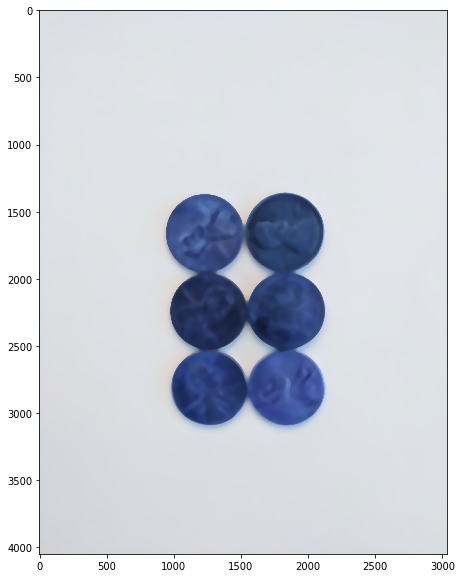

In [24]:
display(img)

In [25]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [27]:
#ret,thresh =  cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV) this still have things in the white phase
ret,thresh= cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

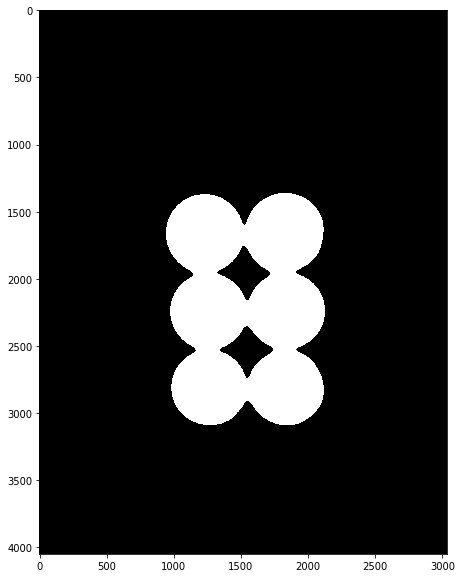

In [28]:
display(thresh)

In [29]:
#Noise Removal - optional for this image

In [30]:
kernel = np.ones((3,3),np.uint8)

In [32]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

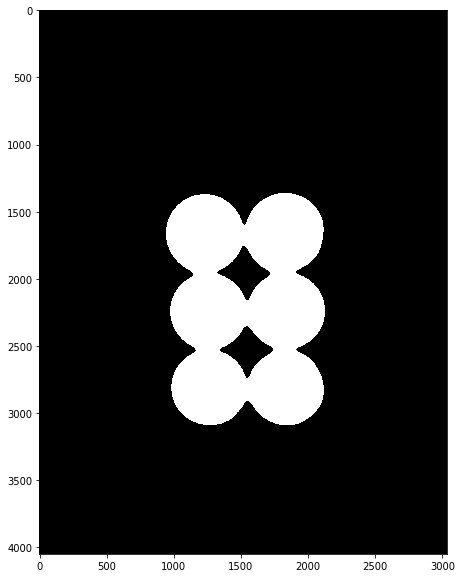

In [33]:
display(opening)

In [34]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

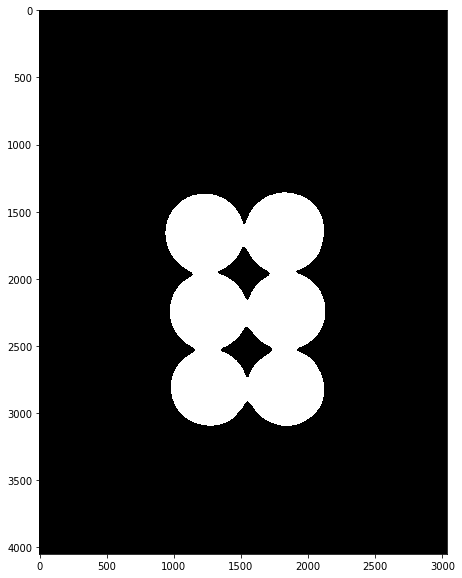

In [35]:
display(sure_bg)

In [46]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

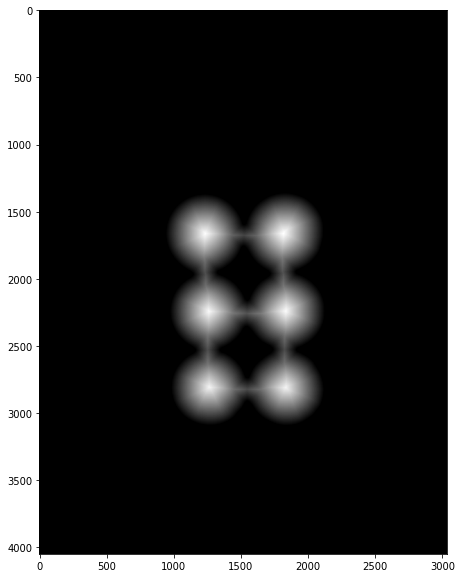

In [41]:
display(dist_transform)

In [48]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

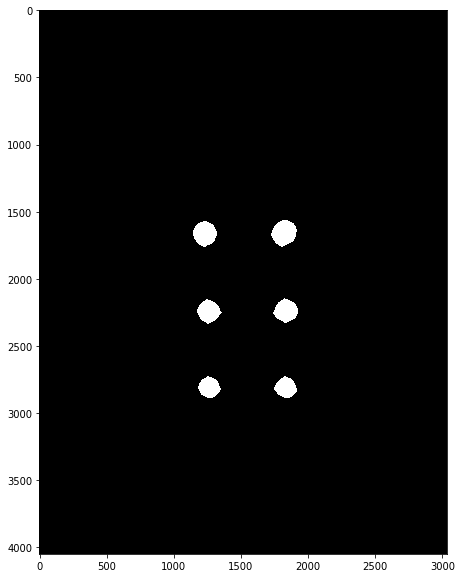

In [49]:
display(sure_fg)

In [50]:
sure_fg = np.uint8(sure_fg)

In [51]:
unkown = cv2.subtract(sure_bg,sure_fg)

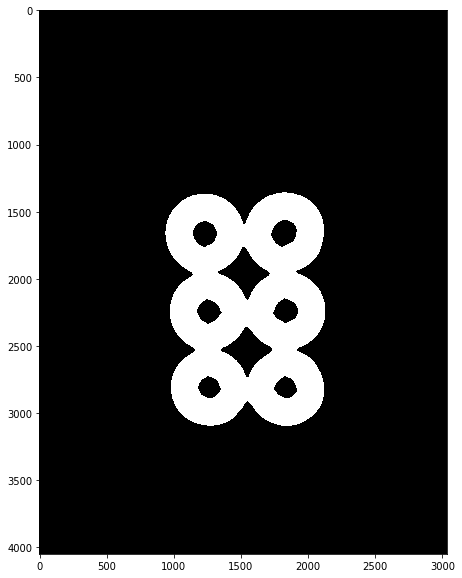

In [52]:
display(unkown)

In [53]:
#create label markers for watershed algorithm

In [54]:
#1st step

In [55]:
ret,markers  = cv2.connectedComponents(sure_fg)

In [56]:
#2nd step
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [57]:
markers = markers +1

In [58]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [59]:
markers[unkown==255]=0

In [60]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

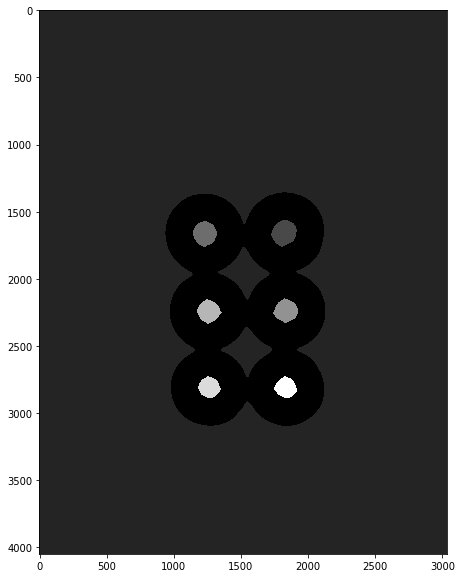

In [61]:
display(markers)

In [63]:
#final step
markers = cv2.watershed(img,markers)

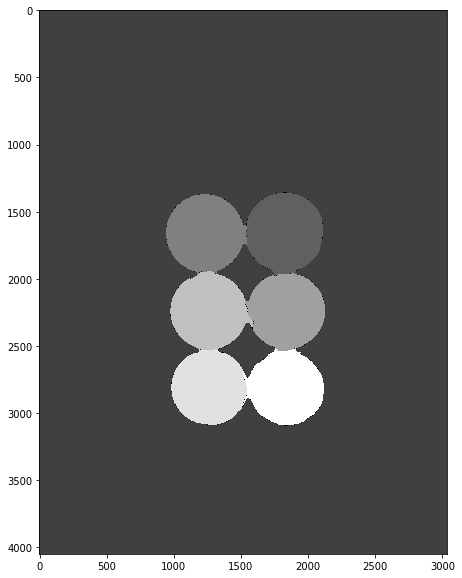

In [64]:
 display(markers
        )

In [65]:
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i  in range (len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

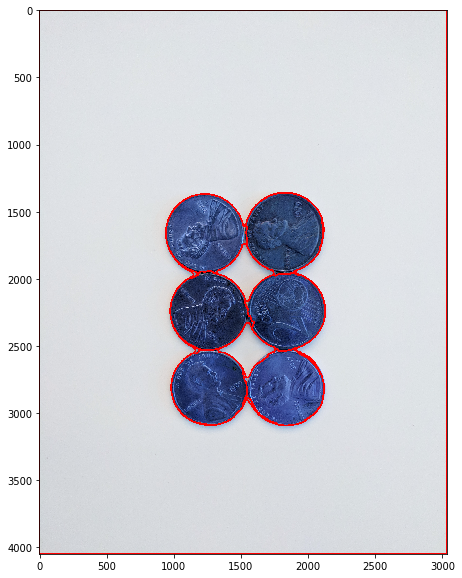

In [67]:
display(sep_coins)